Importamos las librerias que usaremos e importamos el conjunto de datos

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Modulos para escalonado 
from sklearn.preprocessing import scale, MinMaxScaler

### 1. Descripcion del conjunto de datos

### 2. Analisis exploratorio

### 3. Tratamiento de datos atipicos

### **Reduccion de dimensiones**

In [16]:
# Eliminamos las variables discretas del data set porque clustering no funciona con estas
columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv', usecols= columns)

**Matriz de correlacion**

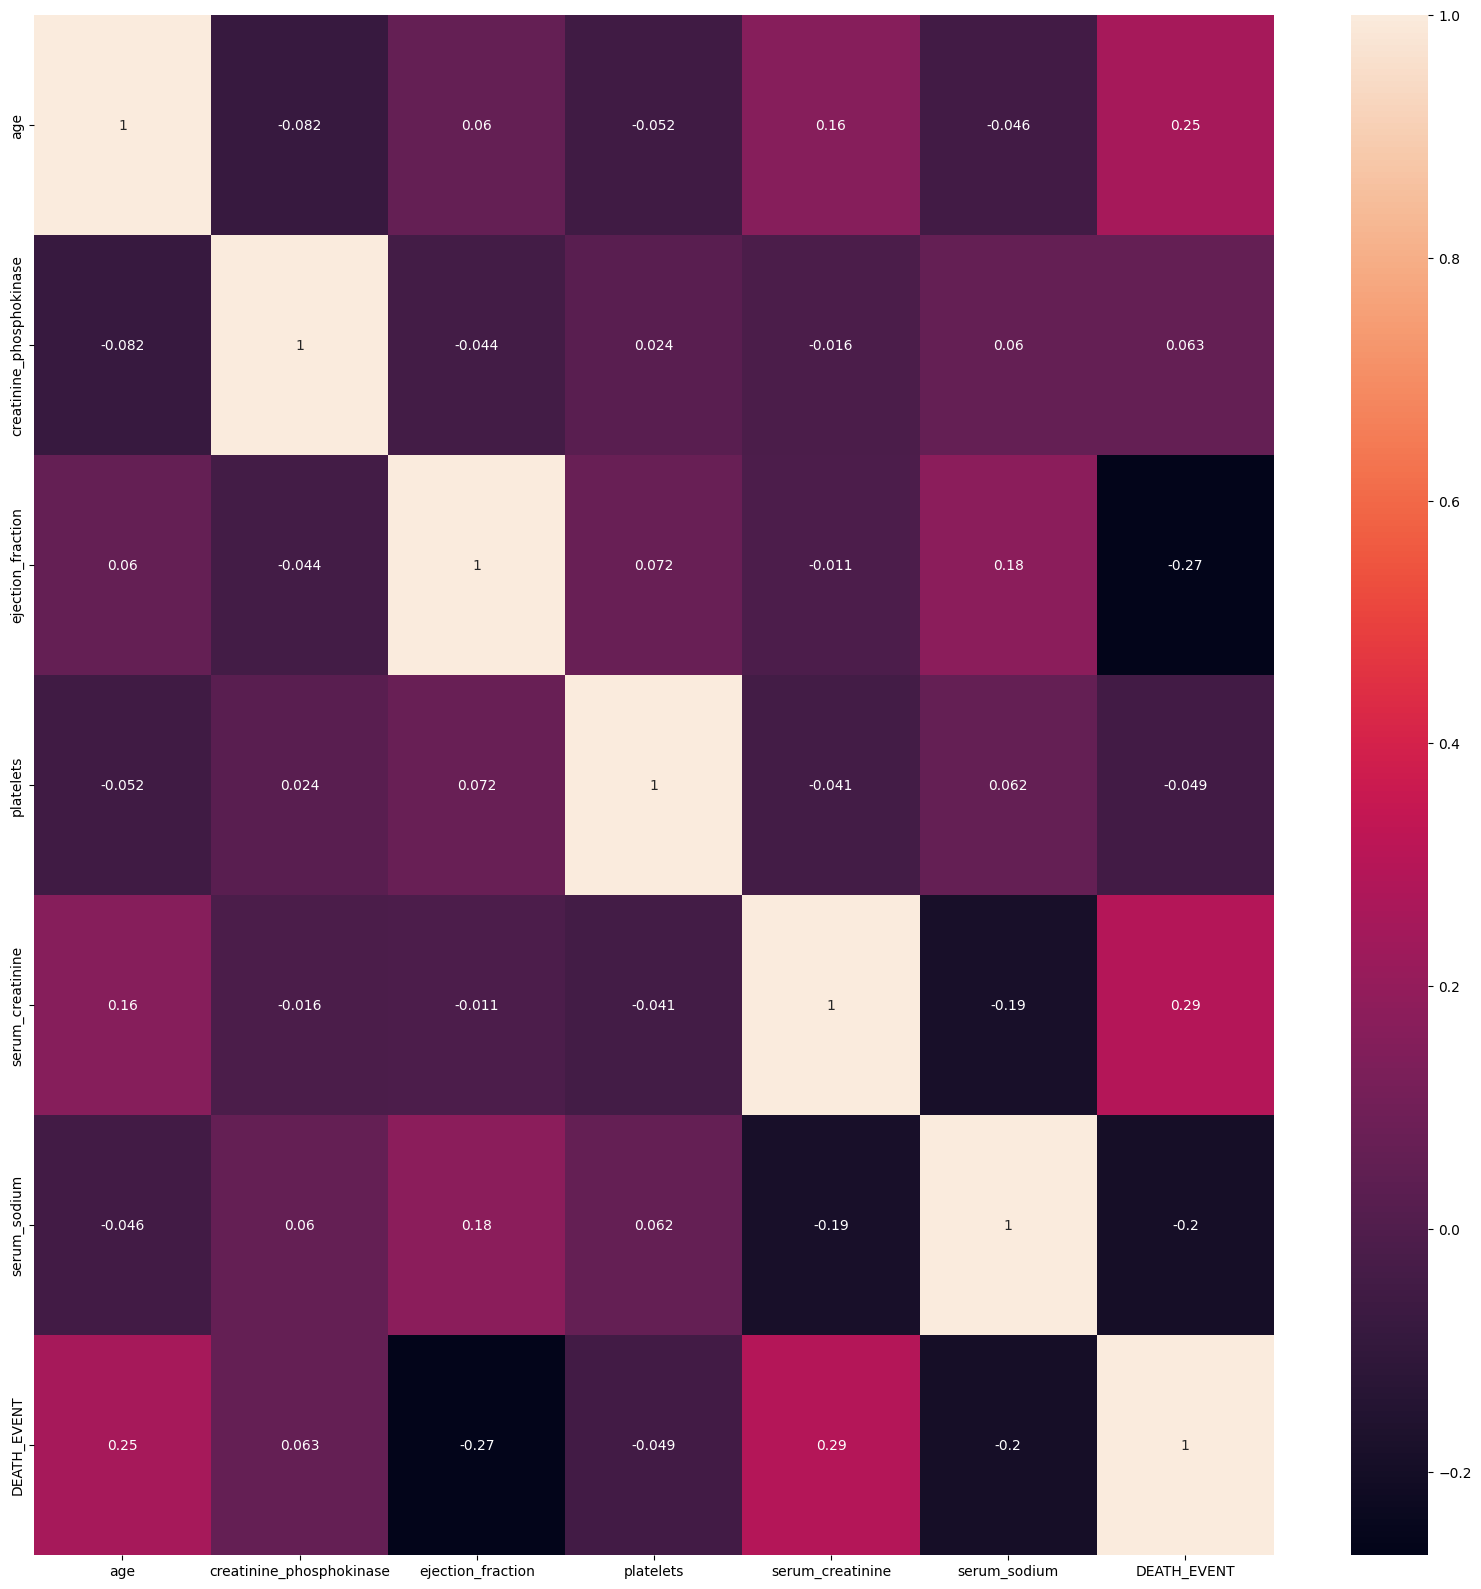

In [17]:
corr_data = heart_df.corr()

plt.figure(figsize= (20,20))
sns.heatmap(corr_data, fmt='.2g', annot= True)
plt.show()

**Estandarizacion de variables**

In [ ]:
scaler =StandardScaler()
df_estand = scaler.fit_transform(data_copy)
df_estand = pd.DataFrame(df_estand, columns=data_copy.columns)
df_estand

### **Clusterizacion**

### preparacion de los datos para el clustering

In [8]:
rip_heart_df = heart_df[heart_df['DEATH_EVENT'] == 1]
alive_heart_df = heart_df[heart_df['DEATH_EVENT'] == 0]

rip_heart_df.drop(['DEATH_EVENT'], axis=1, inplace=True)
alive_heart_df.drop(['DEATH_EVENT'], axis=1, inplace=True)

C:\Users\Josue Paniagua Lopez\AppData\Local\Temp\ipykernel_8216\2200782813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rip_heart_df.drop(['DEATH_EVENT'], axis=1, inplace=True)
C:\Users\Josue Paniagua Lopez\AppData\Local\Temp\ipykernel_8216\2200782813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alive_heart_df.drop(['DEATH_EVENT'], axis=1, inplace=True)


In [9]:
rip_heart_df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.90,130
1,55.0,7861,38,263358.03,1.10,136
2,65.0,146,20,162000.00,1.30,129
3,50.0,111,20,210000.00,1.90,137
4,65.0,160,20,327000.00,2.70,116
...,...,...,...,...,...,...
220,73.0,582,20,263358.03,1.83,134
230,60.0,166,30,62000.00,1.70,127
246,55.0,2017,25,314000.00,1.10,138
262,65.0,258,25,198000.00,1.40,129


In [10]:
alive_heart_df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
14,49.0,80,30,427000.0,1.0,138
20,65.0,52,25,276000.0,1.3,137
23,53.0,63,60,368000.0,0.8,135
33,50.0,159,30,302000.0,1.2,138
38,60.0,2656,30,305000.0,2.3,137
...,...,...,...,...,...,...
294,62.0,61,38,155000.0,1.1,143
295,55.0,1820,38,270000.0,1.2,139
296,45.0,2060,60,742000.0,0.8,138
297,45.0,2413,38,140000.0,1.4,140


In [14]:
# Hay que normalizar los datos para que tengan una escala en comun
# scale
scaled_1 = scale(heart_df) # Z-score

# MinMaxScaler
scaler = MinMaxScaler()
scaled_2 = scaler.fit_transform(heart_df)

### Algoritmo K-medias, Entrenamiento del modelo

C:\Users\Josue Paniagua Lopez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Josue Paniagua Lopez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Josue Paniagua Lopez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

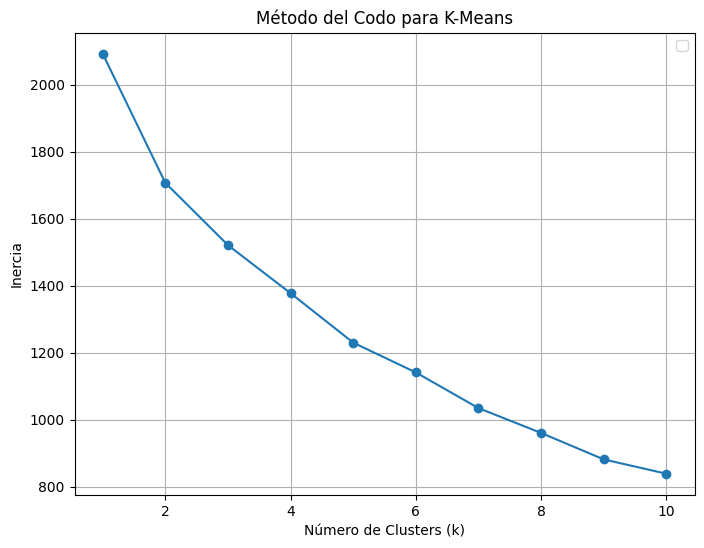

In [15]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_1)
    inertia.append(kmeans.inertia_) 

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-Means')

plt.grid()
plt.legend()
plt.show()

### **Modelo predictiva**

### 7. Resultados y evaluacion del modelo